Analyze the dataset to understand its structure and features. It contains various attributes related to employee demographics, job roles, satisfaction levels, performance ratings, etc., along with a target variable indicating whether an employee has left the company (Yes or No).
Perform preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features if necessary.


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import io

In [112]:
from google.colab import files
uploaded=files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (2).csv


In [114]:
df= pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition (2).csv']))

In [115]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [117]:
df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [118]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [119]:
df['Attrition_ind'] = 0
df.loc[df['Attrition'] =='Yes', 'Attrition_ind'] = 1

In [120]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [121]:
continuous_columns = ['Age','DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike',  'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
data=df[continuous_columns]

<Axes: title={'center': 'Correlation with E Signed'}>

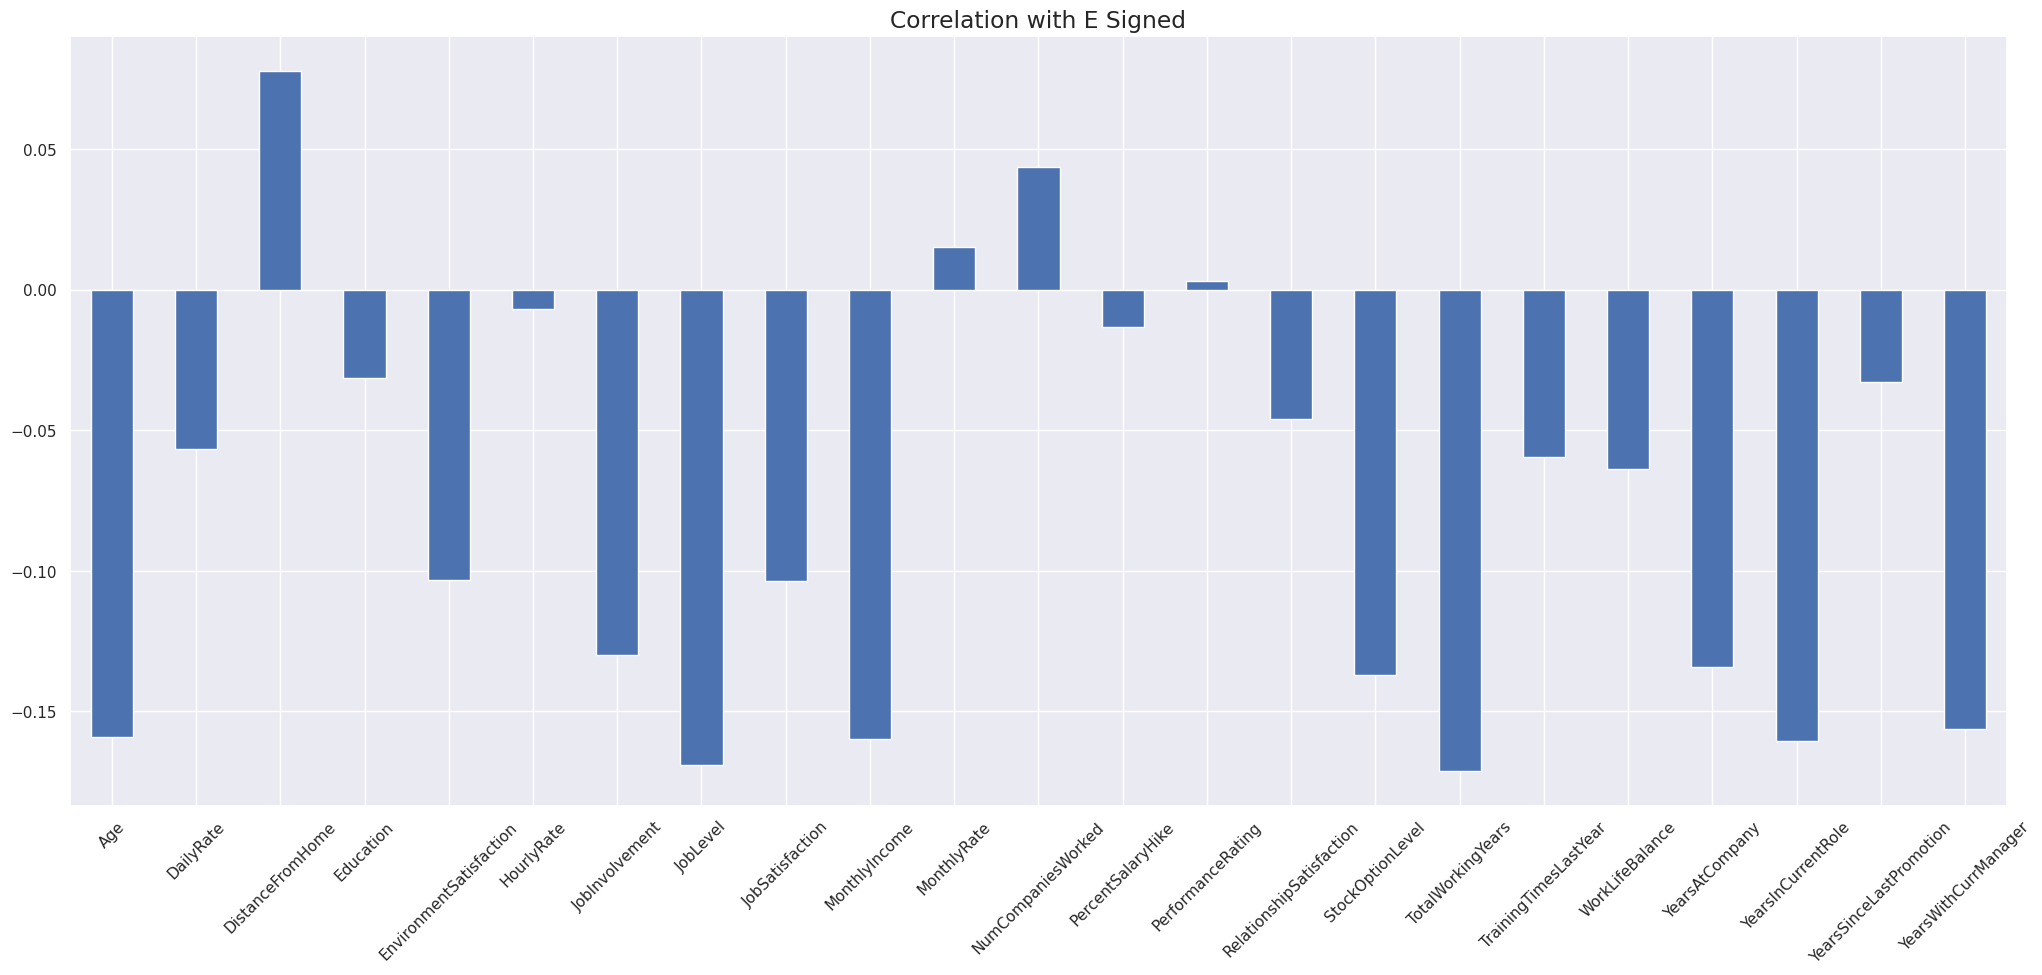

In [122]:
data.corrwith(df.Attrition_ind).plot.bar(figsize = (25, 10), title = "Correlation with E Signed", fontsize = 11, rot = 45, grid = True)

In [123]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = data.corr()
corr.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<Axes: >

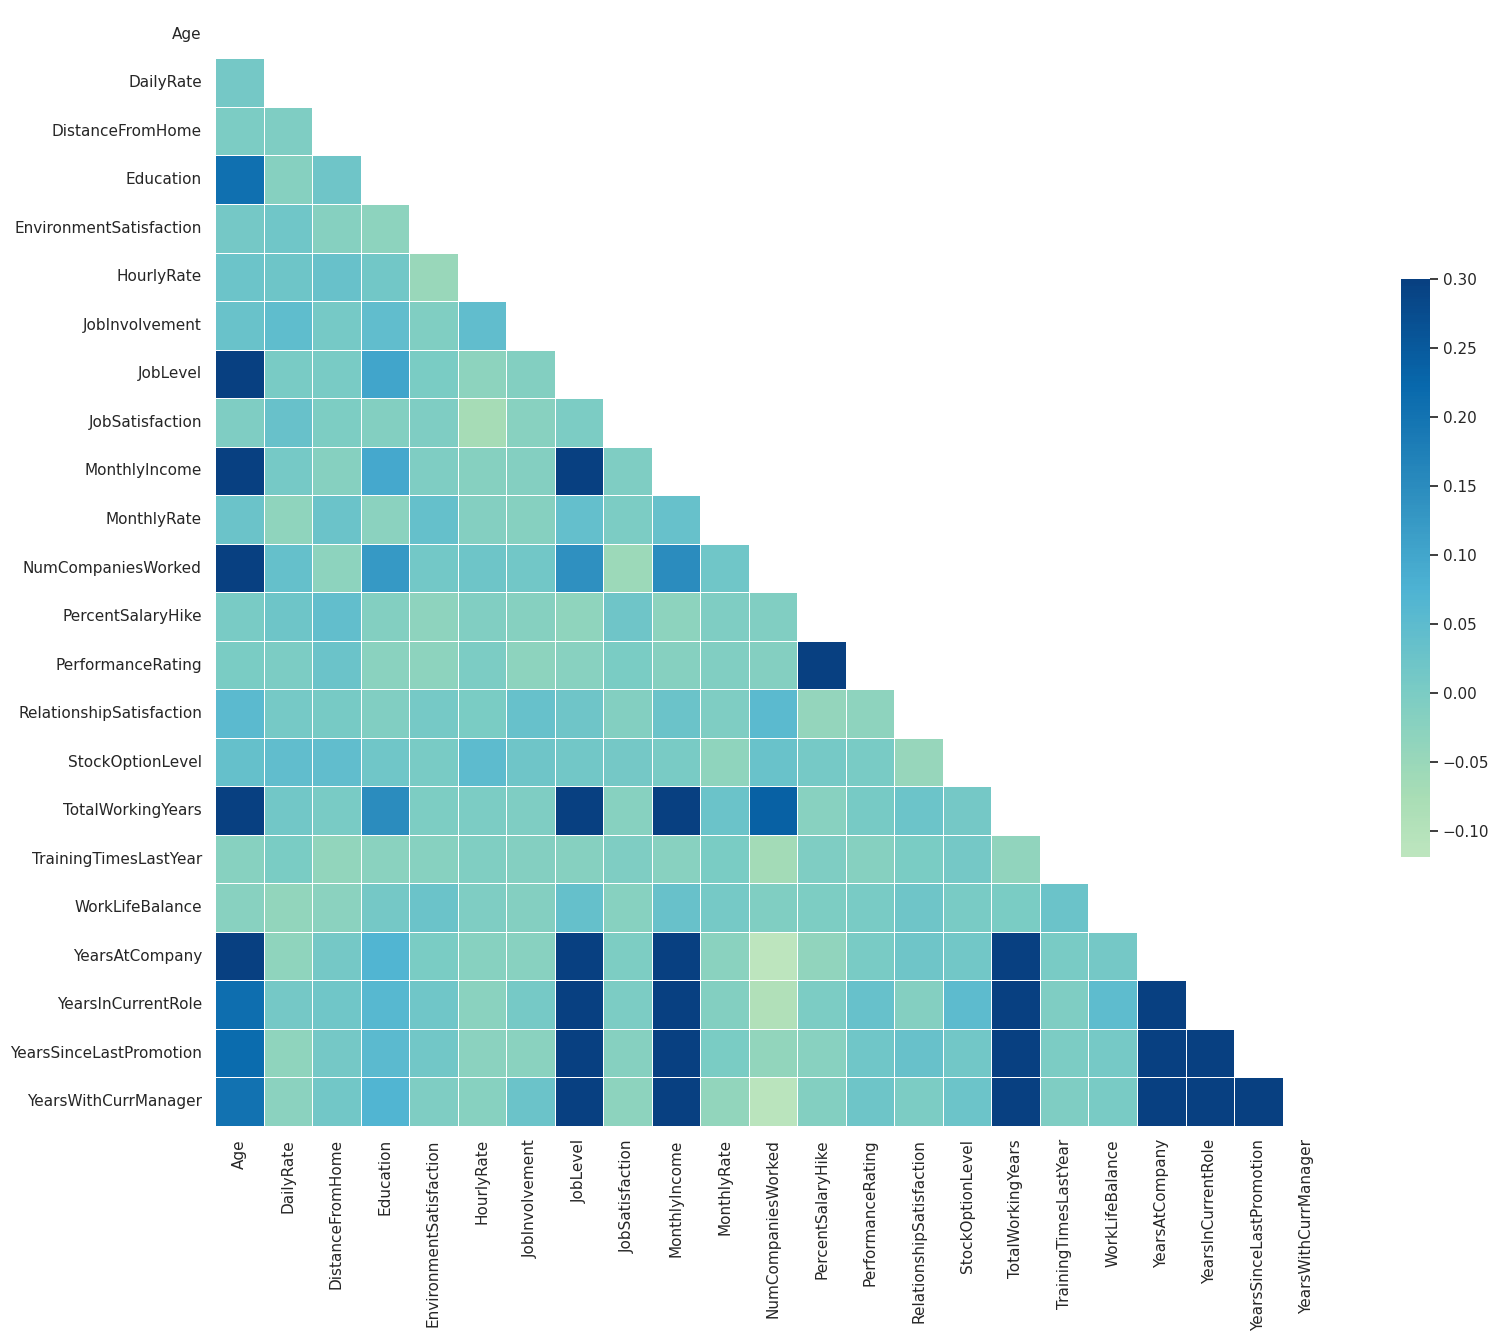

In [124]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap='GnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [125]:
df=pd.get_dummies(df)
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind',
       'Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Techni

In [126]:
data_main=df.drop(['EmployeeCount','EmployeeNumber','Over18_Y','StandardHours','Attrition_No', 'Attrition_Yes'],axis=1)
data_main

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,True,False,False,False,True,False,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,True,False,False,False,True,False,True,False
2,37,1373,2,2,4,92,2,1,3,2090,...,False,False,False,False,False,False,False,True,False,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,True,False,False,False,True,False,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,False,False,False,False,False,False,True,False,True,False
1466,39,613,6,1,4,42,2,3,1,9991,...,False,False,False,False,False,False,True,False,True,False
1467,27,155,4,3,2,87,4,2,2,6142,...,True,False,False,False,False,False,True,False,False,True
1468,49,1023,2,3,4,63,2,2,2,5390,...,False,False,False,True,False,False,True,False,True,False


In [127]:
data_main['Attrition']=data_main['Attrition_ind']
data_main

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,True,False,False,False,True,False,True,1
1,49,279,8,1,3,61,2,2,2,5130,...,False,True,False,False,False,True,False,True,False,0
2,37,1373,2,2,4,92,2,1,3,2090,...,False,False,False,False,False,False,True,False,True,1
3,33,1392,3,4,4,56,3,1,3,2909,...,False,True,False,False,False,True,False,False,True,0
4,27,591,2,1,1,40,3,1,2,3468,...,False,False,False,False,False,True,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,False,False,False,False,False,True,False,True,False,0
1466,39,613,6,1,4,42,2,3,1,9991,...,False,False,False,False,False,True,False,True,False,0
1467,27,155,4,3,2,87,4,2,2,6142,...,False,False,False,False,False,True,False,False,True,0
1468,49,1023,2,3,4,63,2,2,2,5390,...,False,False,True,False,False,True,False,True,False,0


In [128]:
data_main=data_main.drop(['Attrition_ind'],axis=1)
data_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [129]:
X=data_main.drop('Attrition',axis=1)
y=data_main.Attrition

In [130]:
features_label = data_main.columns[:-1]

In [131]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Age                            0.068787
 2) DailyRate                      0.058087
 3) DistanceFromHome               0.050395
 4) Education                      0.047892
 5) EnvironmentSatisfaction        0.046385
 6) HourlyRate                     0.044061
 7) JobInvolvement                 0.043066
 8) JobLevel                       0.041470
 9) JobSatisfaction                0.034565
10) MonthlyIncome                  0.032825
11) MonthlyRate                    0.032558
12) NumCompaniesWorked             0.031942
13) PercentSalaryHike              0.030133
14) PerformanceRating              0.029651
15) RelationshipSatisfaction       0.028564
16) StockOptionLevel               0.028015
17) TotalWorkingYears              0.027299
18) TrainingTimesLastYear          0.024223
19) WorkLifeBalance                0.024184
20) YearsAtCompany                 0.023405
21) YearsInCurrentRole             0.022142
22) YearsSinceLastPromotion        0.021940
23) YearsWithCurrManager        

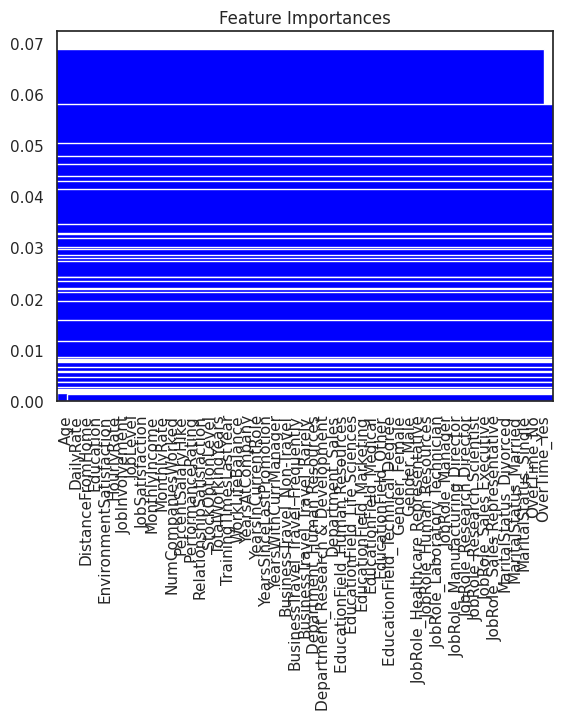

In [132]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="blue", align="center", width=100)
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [133]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [134]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [135]:
## DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_split=2,  min_samples_leaf=1,random_state=42)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['DecisionTree', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.836735,0.52381,0.22449,0.314286


In [136]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.860544,0.833333,0.204082,0.327869


In [137]:
results = pd.concat([results, model_results], ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.836735,0.523810,0.224490,0.314286
1,Random Forest (n=100),0.860544,0.833333,0.204082,0.327869


In [138]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier( n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, random_state =5)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoostingclassifier (n=100)', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,GradientBoostingclassifier (n=100),0.85034,0.6,0.306122,0.405405


In [139]:
results = pd.concat([results, model_results], ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.836735,0.523810,0.224490,0.314286
1,Random Forest (n=100),0.860544,0.833333,0.204082,0.327869
2,GradientBoostingclassifier (n=100),0.850340,0.600000,0.306122,0.405405


In [140]:
import xgboost as xgb
classifier = xgb.XGBClassifier(max_depth=2, n_estimators=5000,
learning_rate=0.05)

classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['xgboost (n=100)', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,xgboost (n=100),0.860544,0.617647,0.428571,0.506024


In [141]:
results = pd.concat([results, model_results], ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.836735,0.523810,0.224490,0.314286
1,Random Forest (n=100),0.860544,0.833333,0.204082,0.327869
2,GradientBoostingclassifier (n=100),0.850340,0.600000,0.306122,0.405405
3,xgboost (n=100),0.860544,0.617647,0.428571,0.506024


In [142]:
## AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(random_state = 0, n_estimators = 100,
                                    )
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['AdaBoostClassifiet (n=100)', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,AdaBoostClassifiet (n=100),0.843537,0.565217,0.265306,0.361111


In [143]:
results = pd.concat([results, model_results], ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.836735,0.523810,0.224490,0.314286
1,Random Forest (n=100),0.860544,0.833333,0.204082,0.327869
2,GradientBoostingclassifier (n=100),0.850340,0.600000,0.306122,0.405405
3,xgboost (n=100),0.860544,0.617647,0.428571,0.506024
4,AdaBoostClassifiet (n=100),0.843537,0.565217,0.265306,0.361111


Test Data Accuracy: 0.8435


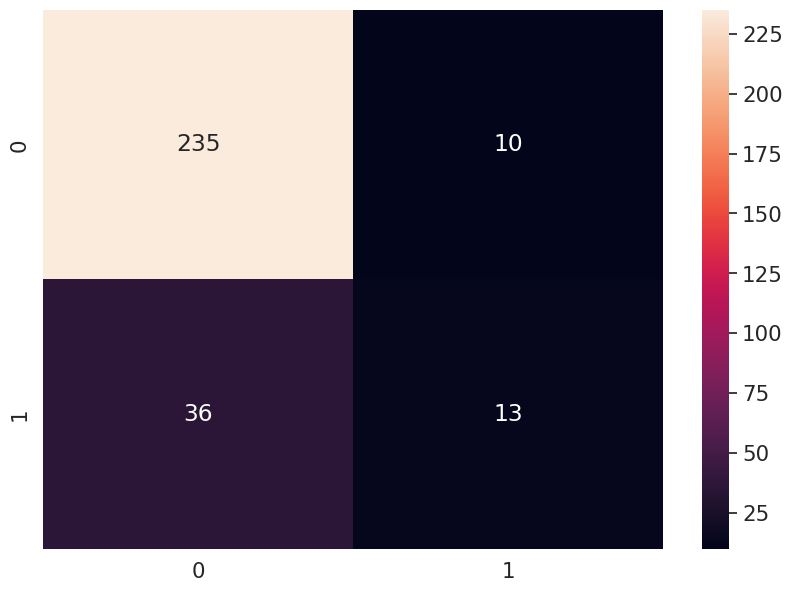

In [144]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [ ]:
# @title
